In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [2]:
book=pd.read_csv("book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
#Apriori Algorithm
frequent_itemsets1 = apriori(book,min_support=0.05,max_len=3,use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
71,0.0640,"(CookBks, GeogBks, ItalCook)"
72,0.0535,"(ArtBks, RefBks, DoItYBks)"
73,0.0585,"(GeogBks, RefBks, DoItYBks)"
74,0.0730,"(ArtBks, GeogBks, DoItYBks)"


<ipython-input-4-0346d4f859d8>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(0,10)),height = frequent_itemsets1.support[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),frequent_itemsets1.itemsets[0:10])


Text(0, 0.5, 'support')

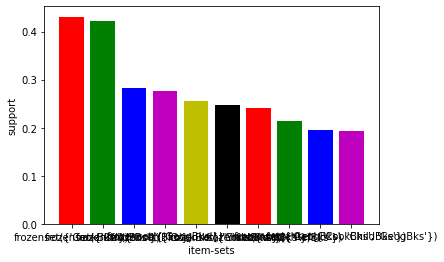

In [4]:
# Most Frequent item sets based on support 
frequent_itemsets1.sort_values('support',ascending = False,inplace=True)
plt.bar(x = list(range(0,10)),height = frequent_itemsets1.support[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),frequent_itemsets1.itemsets[0:10])
plt.xlabel('item-sets');plt.ylabel('support')

In [5]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.7)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.4230,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,(CookBks),(GeogBks),0.4310,0.276,0.1925,0.446636,1.618245,0.073544,1.308361
...,...,...,...,...,...,...,...,...,...
289,"(GeogBks, ItalCook)",(ChildBks),0.0640,0.423,0.0525,0.820312,1.939273,0.025428,3.211130
290,"(ChildBks, ItalCook)",(GeogBks),0.0850,0.276,0.0525,0.617647,2.237852,0.029040,1.893538
291,(GeogBks),"(ChildBks, ItalCook)",0.2760,0.085,0.0525,0.190217,2.237852,0.029040,1.129933
292,(ChildBks),"(GeogBks, ItalCook)",0.4230,0.064,0.0525,0.124113,1.939273,0.025428,1.068632


In [6]:
#Top 10 rules as per lift value
rules1.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
234,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
239,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
274,"(ArtBks, CookBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778
279,(ItalCook),"(ArtBks, CookBks)",0.1135,0.1670,0.0565,0.497797,2.980822,0.037545,1.658693
220,"(CookBks, GeogBks)",(ItalCook),0.1925,0.1135,0.0640,0.332468,2.929229,0.042151,1.328025
225,(ItalCook),"(CookBks, GeogBks)",0.1135,0.1925,0.0640,0.563877,2.929229,0.042151,1.851540
154,"(CookBks, ChildBks)",(ItalCook),0.2560,0.1135,0.0850,0.332031,2.925385,0.055944,1.327158
159,(ItalCook),"(CookBks, ChildBks)",0.1135,0.2560,0.0850,0.748899,2.925385,0.055944,2.962947
243,"(CookBks, DoItYBks)",(ItalCook),0.1875,0.1135,0.0585,0.312000,2.748899,0.037219,1.288517
246,(ItalCook),"(CookBks, DoItYBks)",0.1135,0.1875,0.0585,0.515419,2.748899,0.037219,1.676705


In [7]:
#Rules having lift value greater than 1
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.4230,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,(CookBks),(GeogBks),0.4310,0.276,0.1925,0.446636,1.618245,0.073544,1.308361
...,...,...,...,...,...,...,...,...,...
289,"(GeogBks, ItalCook)",(ChildBks),0.0640,0.423,0.0525,0.820312,1.939273,0.025428,3.211130
290,"(ChildBks, ItalCook)",(GeogBks),0.0850,0.276,0.0525,0.617647,2.237852,0.029040,1.893538
291,(GeogBks),"(ChildBks, ItalCook)",0.2760,0.085,0.0525,0.190217,2.237852,0.029040,1.129933
292,(ChildBks),"(GeogBks, ItalCook)",0.4230,0.064,0.0525,0.124113,1.939273,0.025428,1.068632


<ipython-input-8-8c6570686c14>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(0,10)),height = rules1.lift[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),rules1.antecedents[0:10])


Text(0, 0.5, 'lift')

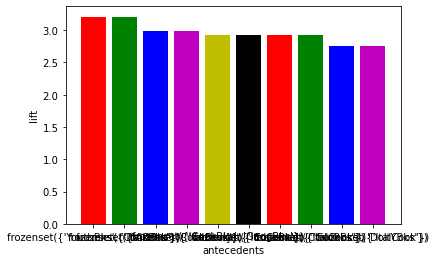

In [8]:
# Top 10 antecedents based on lift for rules1
rules1.sort_values('lift',ascending = False,inplace=True)
plt.bar(x = list(range(0,10)),height = rules1.lift[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),rules1.antecedents[0:10])
plt.xlabel('antecedents');plt.ylabel('lift')

In [9]:
##Apriori Algorithm
frequent_itemsets2 = apriori(book,min_support=0.075,max_len=4,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
58,0.0830,"(YouthBks, GeogBks, ChildBks, CookBks)"
59,0.0820,"(ArtBks, CookBks, ChildBks, DoItYBks)"
60,0.0890,"(CookBks, GeogBks, ChildBks, DoItYBks)"
61,0.0785,"(CookBks, GeogBks, ChildBks, RefBks)"


In [10]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.7)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
275,"(GeogBks, ChildBks)","(ArtBks, CookBks)",0.1950,0.1670,0.0835,0.428205,2.564103,0.050935,1.456816
276,(ArtBks),"(CookBks, GeogBks, ChildBks)",0.2410,0.1495,0.0835,0.346473,2.317545,0.047471,1.301400
277,(CookBks),"(ArtBks, GeogBks, ChildBks)",0.4310,0.1020,0.0835,0.193735,1.899368,0.039538,1.113778
278,(GeogBks),"(ArtBks, CookBks, ChildBks)",0.2760,0.1265,0.0835,0.302536,2.391591,0.048586,1.252395


In [11]:
rules2.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
100,"(CookBks, ChildBks)",(ItalCook),0.2560,0.1135,0.0850,0.332031,2.925385,0.055944,1.327158
105,(ItalCook),"(CookBks, ChildBks)",0.1135,0.2560,0.0850,0.748899,2.925385,0.055944,2.962947
257,"(CookBks, ChildBks)","(GeogBks, RefBks)",0.2560,0.1105,0.0785,0.306641,2.775028,0.050212,1.282885
260,"(GeogBks, RefBks)","(CookBks, ChildBks)",0.1105,0.2560,0.0785,0.710407,2.775028,0.050212,2.569125
202,"(YouthBks, DoItYBks)","(CookBks, ChildBks)",0.1155,0.2560,0.0820,0.709957,2.773268,0.052432,2.565134
203,"(CookBks, ChildBks)","(YouthBks, DoItYBks)",0.2560,0.1155,0.0820,0.320312,2.773268,0.052432,1.301333
201,"(YouthBks, CookBks)","(ChildBks, DoItYBks)",0.1620,0.1840,0.0820,0.506173,2.750939,0.052192,1.652400
204,"(ChildBks, DoItYBks)","(YouthBks, CookBks)",0.1840,0.1620,0.0820,0.445652,2.750939,0.052192,1.511686
261,"(ChildBks, RefBks)","(CookBks, GeogBks)",0.1515,0.1925,0.0785,0.518152,2.691698,0.049336,1.675839
256,"(CookBks, GeogBks)","(ChildBks, RefBks)",0.1925,0.1515,0.0785,0.407792,2.691698,0.049336,1.432774


<ipython-input-12-2f5ea5fe7d15>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(0,10)),height = rules2.lift[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),rules2.antecedents[0:10])


Text(0, 0.5, 'lift')

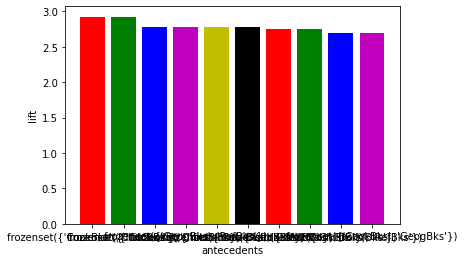

In [12]:
# Top 10 antecedents based on lift for rules2
rules2.sort_values('lift',ascending = False,inplace=True)
plt.bar(x = list(range(0,10)),height = rules2.lift[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),rules2.antecedents[0:10])
plt.xlabel('antecedents');plt.ylabel('lift')

In [13]:
##Apriori Algorithm
frequent_itemsets3 = apriori(book,min_support=0.1,max_len=4,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [14]:
rules3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=0.7)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [15]:
rules3.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


<ipython-input-16-2cbae70a6fad>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(0,10)),height = rules3.lift[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),rules3.antecedents[0:10])


Text(0, 0.5, 'lift')

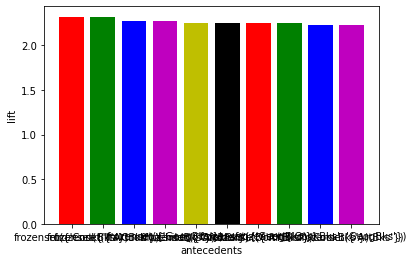

In [16]:
# Top 10 antecedents based on lift for rules3
rules3.sort_values('lift',ascending = False,inplace=True)
plt.bar(x = list(range(0,10)),height = rules3.lift[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),rules3.antecedents[0:10])
plt.xlabel('antecedents');plt.ylabel('lift')

In [17]:
########################## To eliminate Redudancy in Rule3 #################################### 
def to_list(i):
    return (sorted(list(i)))

In [18]:
ma_X = rules3.antecedents.apply(to_list)+rules3.consequents.apply(to_list)

In [19]:
ma_X = ma_X.apply(sorted)

In [20]:
rules_sets = list(ma_X)

In [21]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []

In [22]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [23]:
# getting rules without any redudancy 
rules_no_redudancy  = rules3.iloc[index_rules,:]

In [24]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
99,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
52,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
65,"(CookBks, ChildBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
92,(GeogBks),"(CookBks, DoItYBks)",0.2760,0.1875,0.1085,0.393116,2.096618,0.056750,1.338806
72,"(ChildBks, DoItYBks)",(GeogBks),0.1840,0.2760,0.1045,0.567935,2.057735,0.053716,1.675673
60,"(CookBks, ChildBks)",(ArtBks),0.2560,0.2410,0.1265,0.494141,2.050376,0.064804,1.500417
42,"(CookBks, ChildBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850


<ipython-input-25-aa4940d909f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_no_redudancy.sort_values('lift',ascending = False,inplace=True)
<ipython-input-25-aa4940d909f3>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(0,10)),height = rules_no_redudancy.lift[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),rules_no_redudancy.antecedents[0:10])


Text(0, 0.5, 'lift')

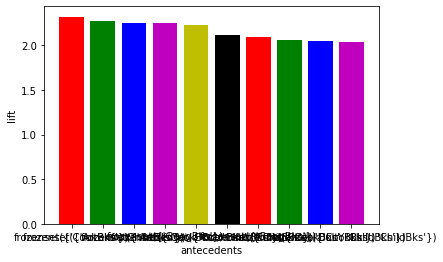

In [25]:
# Top 10 antecedents based on lift for rules3 after eliminating redundancy
rules_no_redudancy.sort_values('lift',ascending = False,inplace=True)
plt.bar(x = list(range(0,10)),height = rules_no_redudancy.lift[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),rules_no_redudancy.antecedents[0:10])
plt.xlabel('antecedents');plt.ylabel('lift')